In [ ]:
# Monte Carlo Simulations: First with Bitcoin, then with Nvidia (NVDA)

In [2]:
#Import Libraries
import numpy as np  
import pandas as pd  
import pandas_datareader as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [11]:
ticker = 'BTC_USD'
iterations = 25 # amount of sims
t_intervals = 45 # time frame of single simulation
df = pd.read_csv('btc_data.csv', index_col=0, usecols=['Date', 'Price'])
df = df.rename(columns={'Price': ticker})
df[ticker] = df[ticker].str.replace(',', '').astype(float)
df = df.iloc[::-1]
df.head()

,BTC_USD
Date,
"Jan 01, 2012",5.3
"Jan 02, 2012",5.2
"Jan 03, 2012",4.9
"Jan 04, 2012",5.6
"Jan 05, 2012",6.9


In [13]:
df.tail()

,BTC_USD
Date,
"Jun 20, 2023",28307.7
"Jun 21, 2023",29996.9
"Jun 22, 2023",29890.5
"Jun 23, 2023",30679.4
"Jun 24, 2023",30459.3


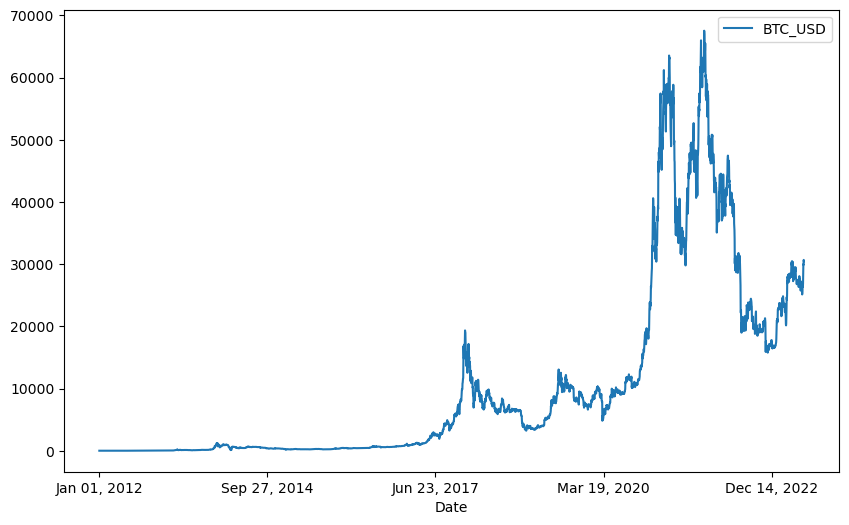

In [12]:
#Preparing log returns from data
log_returns = np.log(1 + df.pct_change())
#Plot of asset historical closing price
df.plot(figsize=(10, 6));

<Axes: xlabel='Date'>

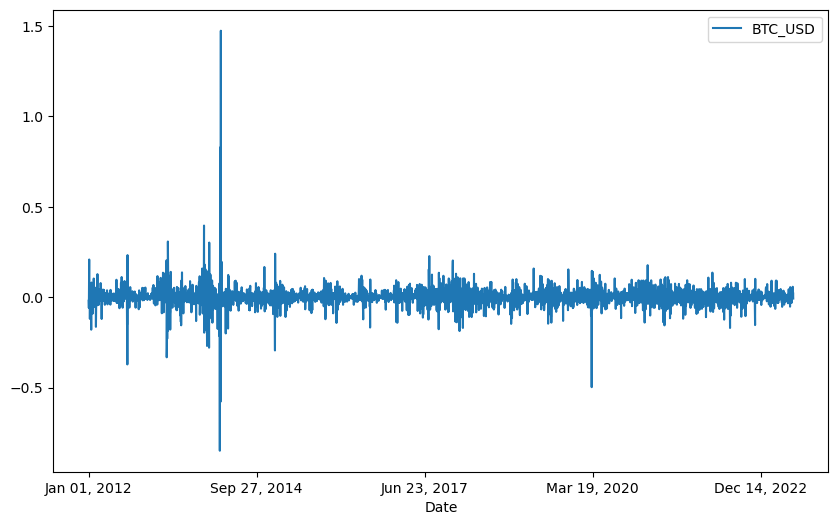

In [14]:
#Plot of log returns
log_returns.plot(figsize = (10, 6))

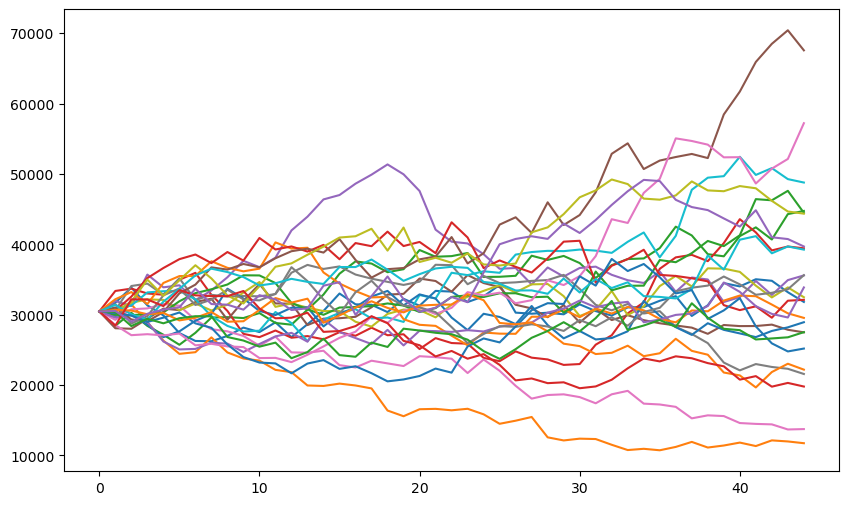

In [17]:
#Setting up drift and random component in relation to asset data
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
#Takes last data point as startpoint point for simulation
S0 = df.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
#Applies Monte Carlo simulation in asset
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
#Plot simulations
plt.figure(figsize=(10,6))
plt.plot(price_list);

In [22]:
ticker = 'NVDA'
iterations = 25 # amount of sims
t_intervals = 45 # time frame of single simulation
df = pd.read_csv('StockDataset/stocks/NVDA.csv', index_col=0, usecols=['Date', 'Adj Close'])
df = df.rename(columns={'Adj Close': ticker})
#df[ticker] = df[ticker].str.replace(',', '').astype(float)
#df = df.iloc[::-1]
df.head()

,NVDA
Date,
1999-01-22,1.509998
1999-01-25,1.668188
1999-01-26,1.538759
1999-01-27,1.533965
1999-01-28,1.529172


In [23]:
df.tail()

,NVDA
Date,
2020-03-26,257.239990
2020-03-27,252.729996
2020-03-30,265.589996
2020-03-31,263.600006
2020-04-01,243.070007


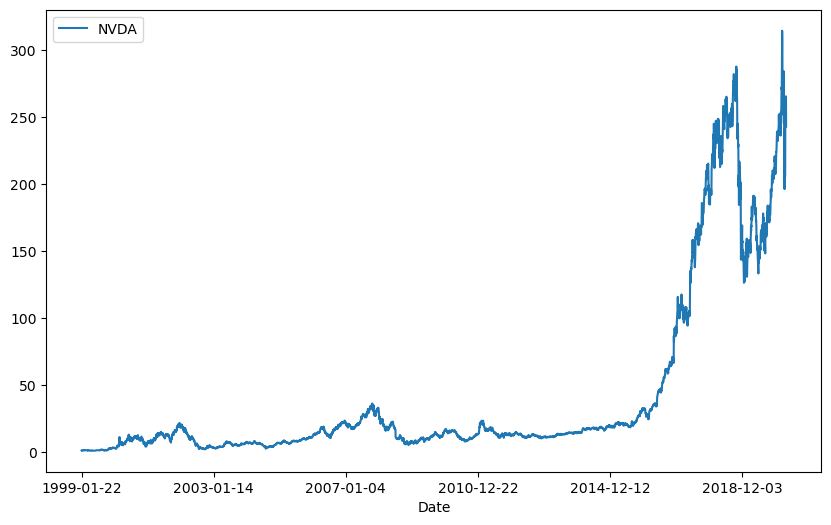

In [24]:
#Preparing log returns from data
log_returns = np.log(1 + df.pct_change())
#Plot of asset historical closing price
df.plot(figsize=(10, 6));

<Axes: xlabel='Date'>

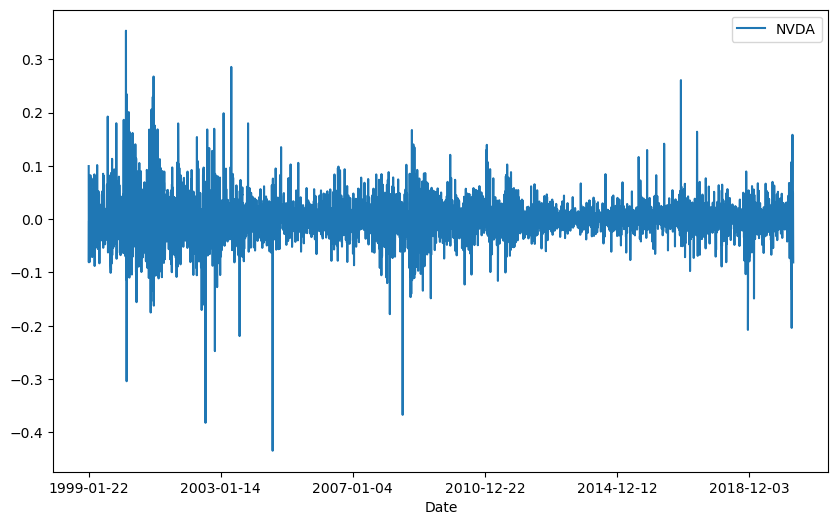

In [26]:
#Plot of log returns
log_returns.plot(figsize = (10, 6))

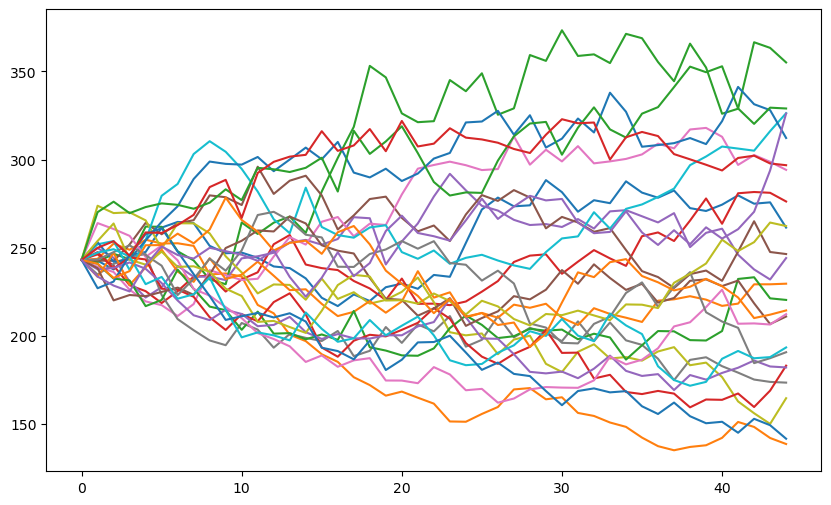

In [28]:
#Setting up drift and random component in relatoin to asset data
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
#Takes last data point as startpoint point for simulation
S0 = df.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
#Applies Monte Carlo simulation in asset
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
#Plot simulations
plt.figure(figsize=(10,6))
plt.plot(price_list);